In [140]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.inspection import PartialDependenceDisplay

In [141]:
Train_df = pd.read_csv("urban_train_df.csv",index_col='Name')

In [142]:
Train_df=Train_df.drop(['Location','Cluster'],axis=1)

In [143]:
Train_df.head()

,Cuisine,Seating Capacity,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue,Review Quality Score,Meal Price Category
Name,,,,,,,,,,,,,,
Restaurant 5818,Italian,90,5031,58655,13,805,3.5,9.6,Yes,86,29,958061.50,817.414508,Medium
Restaurant 808,Indian,87,4113,44551,14,528,4.7,8.0,Yes,52,48,693454.50,704.871694,Medium
Restaurant 2853,Italian,83,3941,44981,16,702,8.1,1.0,No,1,37,922103.10,543.752893,Medium
Restaurant 1744,Mexican,78,2614,26987,3,310,3.3,2.4,No,65,40,467711.46,1007.924775,Low
Restaurant 2785,American,77,1843,26233,11,516,9.2,9.8,Yes,36,75,665358.21,696.098096,Medium


In [144]:
Train_x=Train_df.drop('Revenue',axis=1)

In [145]:
Train_x.head()

,Cuisine,Seating Capacity,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Review Quality Score,Meal Price Category
Name,,,,,,,,,,,,,
Restaurant 5818,Italian,90,5031,58655,13,805,3.5,9.6,Yes,86,29,817.414508,Medium
Restaurant 808,Indian,87,4113,44551,14,528,4.7,8.0,Yes,52,48,704.871694,Medium
Restaurant 2853,Italian,83,3941,44981,16,702,8.1,1.0,No,1,37,543.752893,Medium
Restaurant 1744,Mexican,78,2614,26987,3,310,3.3,2.4,No,65,40,1007.924775,Low
Restaurant 2785,American,77,1843,26233,11,516,9.2,9.8,Yes,36,75,696.098096,Medium


In [146]:
# Apply log transformation
Train_df['Log_Revenue'] = np.log1p(Train_df['Revenue'])  # log1p handles zero values safely
Train_y=Train_df['Log_Revenue']
Train_y.head()

Name
Restaurant 5818    13.772668
Restaurant 808     13.449442
Restaurant 2853    13.734413
Restaurant 1744    13.055609
Restaurant 2785    13.408082
Name: Log_Revenue, dtype: float64

In [147]:
Test_df = pd.read_csv("urban_test_df.csv",index_col='Name')

In [148]:
Test_df=Test_df.drop(['Location','Cluster'],axis=1)

In [149]:
Test_df.head()

,Cuisine,Seating Capacity,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue,Review Quality Score,Meal Price Category
Name,,,,,,,,,,,,,,
Restaurant 7623,Japanese,86,9065,96518,18,696,9.8,5.7,Yes,8,72,1281406.16,916.451777,High
Restaurant 1029,Mexican,89,1414,20379,4,714,7.7,6.1,No,45,0,689655.31,269.778574,Medium
Restaurant 2557,French,77,2487,30116,9,118,9.2,4.3,No,6,6,1047222.30,341.468235,High
Restaurant 2376,Japanese,85,3459,42040,13,220,4.4,8.4,Yes,52,67,1431431.14,564.044357,High
Restaurant 594,Japanese,74,5519,63074,3,628,1.8,9.3,Yes,25,52,1224389.07,1113.637721,High


In [150]:
Test_x=Test_df.drop('Revenue',axis=1)

In [151]:
Test_x.head()

,Cuisine,Seating Capacity,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Review Quality Score,Meal Price Category
Name,,,,,,,,,,,,,
Restaurant 7623,Japanese,86,9065,96518,18,696,9.8,5.7,Yes,8,72,916.451777,High
Restaurant 1029,Mexican,89,1414,20379,4,714,7.7,6.1,No,45,0,269.778574,Medium
Restaurant 2557,French,77,2487,30116,9,118,9.2,4.3,No,6,6,341.468235,High
Restaurant 2376,Japanese,85,3459,42040,13,220,4.4,8.4,Yes,52,67,564.044357,High
Restaurant 594,Japanese,74,5519,63074,3,628,1.8,9.3,Yes,25,52,1113.637721,High


In [152]:
# Apply log transformation
Test_df['Log_Revenue'] = np.log1p(Test_df['Revenue'])  # log1p handles zero values safely
Test_y=Test_df['Log_Revenue']
Test_y.head()

Name
Restaurant 7623    14.063469
Restaurant 1029    13.443949
Restaurant 2557    13.861653
Restaurant 2376    14.174186
Restaurant 594     14.017953
Name: Log_Revenue, dtype: float64

In [153]:
# === Train set ===

encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
Train_x[["Meal Price Category"]] = encoder.fit_transform(Train_x[["Meal Price Category"]])
Train_x["Meal Price Category"] = Train_x["Meal Price Category"].astype(int)

# === Test set ===


encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
Test_x[["Meal Price Category"]] = encoder.fit_transform(Test_x[["Meal Price Category"]])
Test_x["Meal Price Category"] = Test_x["Meal Price Category"].astype(int)

In [154]:
categorical_cols = ['Cuisine', 'Parking Availability'] 
ordinal_categorical = [ 'Meal Price Category','Cuisine','Parking Availability']
numerical_cols = [col for col in Train_x.columns if col not in ordinal_categorical]
numerical_cols = [col for col in Test_x.columns if col not in ordinal_categorical]

In [155]:
# Initialize encoder 
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform
encoded_cats = encoder.fit_transform(Train_x[categorical_cols])
encoded_cats_test = encoder.transform(Test_x[categorical_cols])  # Use transform() for test set

# Convert to DataFrame correctly
encoded_df = pd.DataFrame(
    encoded_cats,
    columns=encoder.get_feature_names_out()
)

encoded_df_test = pd.DataFrame(
    encoded_cats_test,
    columns=encoder.get_feature_names_out()
)


In [156]:
# Scale numerical features (critical for distance calculations)

scaler = StandardScaler()
Train_x[numerical_cols] = scaler.fit_transform(Train_x[numerical_cols])
Test_x[numerical_cols] = scaler.fit_transform(Test_x[numerical_cols])

In [157]:
Train_x.head()

,Cuisine,Seating Capacity,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Review Quality Score,Meal Price Category
Name,,,,,,,,,,,,,
Restaurant 5818,Italian,1.659144,0.104789,0.313921,0.530910,1.004639,-0.795607,1.595884,Yes,2.015187,-0.424978,0.405031,1
Restaurant 808,Indian,1.163380,-0.350970,-0.372899,0.714167,0.010077,-0.330101,0.981525,Yes,0.546609,0.383516,0.038523,1
Restaurant 2853,Italian,0.502363,-0.436363,-0.351959,1.080680,0.634820,0.988832,-1.706299,No,-1.656259,-0.084560,-0.486179,1
Restaurant 1744,Mexican,-0.323909,-1.095178,-1.228209,-1.301658,-0.772648,-0.873191,-1.168734,No,1.108124,0.043097,1.025449,0
Restaurant 2785,American,-0.489163,-1.477957,-1.264926,0.164396,-0.033009,1.415546,1.672679,Yes,-0.144487,1.532428,0.009950,1


In [158]:
# Combine categorical features with numerical features

Train_x1 = pd.concat([Train_x[numerical_cols].reset_index(drop=True),
    encoded_df], axis=1)

Test_x1 = pd.concat([Test_x[numerical_cols].reset_index(drop=True),
    encoded_df_test], axis=1)

In [159]:
## Add meal price category 

Train_x1['Meal Price Category'] = Train_x['Meal Price Category'].values
Test_x1['Meal Price Category'] = Test_x['Meal Price Category'].values

In [160]:
Train_x1.head()

,Seating Capacity,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Ambience Score,Service Quality Score,Weekend Reservations,Weekday Reservations,Review Quality Score,Cuisine_French,Cuisine_Indian,Cuisine_Italian,Cuisine_Japanese,Cuisine_Mexican,Parking Availability_Yes,Meal Price Category
0,1.659144,0.104789,0.313921,0.530910,1.004639,-0.795607,1.595884,2.015187,-0.424978,0.405031,0.0,0.0,1.0,0.0,0.0,1.0,1
1,1.163380,-0.350970,-0.372899,0.714167,0.010077,-0.330101,0.981525,0.546609,0.383516,0.038523,0.0,1.0,0.0,0.0,0.0,1.0,1
2,0.502363,-0.436363,-0.351959,1.080680,0.634820,0.988832,-1.706299,-1.656259,-0.084560,-0.486179,0.0,0.0,1.0,0.0,0.0,0.0,1
3,-0.323909,-1.095178,-1.228209,-1.301658,-0.772648,-0.873191,-1.168734,1.108124,0.043097,1.025449,0.0,0.0,0.0,0.0,1.0,0.0,0
4,-0.489163,-1.477957,-1.264926,0.164396,-0.033009,1.415546,1.672679,-0.144487,1.532428,0.009950,0.0,0.0,0.0,0.0,0.0,1.0,1


In [131]:
model = LinearRegression()
model.fit(Train_x1, Train_y)

LinearRegression()

In [132]:
# Define RMSE function
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Predict
mlr_train_predictions = model.predict(Train_x1)
mlr_test_predictions = model.predict(Test_x1)

# MSE
mlr_train_mse = mean_squared_error(Train_y, mlr_train_predictions)
mlr_test_mse = mean_squared_error(Test_y, mlr_test_predictions)

# RMSE
mlr_train_rmse = root_mean_squared_error(Train_y, mlr_train_predictions)
mlr_test_rmse = root_mean_squared_error(Test_y, mlr_test_predictions)

# MAE
mlr_train_mae = mean_absolute_error(Train_y, mlr_train_predictions)
mlr_test_mae = mean_absolute_error(Test_y, mlr_test_predictions)

# R²
mlr_train_r2 = r2_score(Train_y, mlr_train_predictions)
mlr_test_r2 = r2_score(Test_y, mlr_test_predictions)

# MSE Difference
mlr_mse_difference = mlr_train_mse - mlr_test_mse

# Print
print("MLR Train MSE:", mlr_train_mse)
print("MLR Train RMSE:", mlr_train_rmse)
print("MLR Train MAE:", mlr_train_mae)
print("MLR Train R²:", mlr_train_r2)

print("MLR Test MSE:", mlr_test_mse)
print("MLR Test RMSE:", mlr_test_rmse)
print("MLR Test MAE:", mlr_test_mae)
print("MLR Test R²:", mlr_test_r2)

print("MLR Train-Test MSE Difference:", mlr_mse_difference)

MLR Train MSE: 0.0037512591158127004
MLR Train RMSE: 0.061247523344317364
MLR Train MAE: 0.05030458601563518
MLR Train R²: 0.9591230075590418
MLR Test MSE: 0.003848195315642102
MLR Test RMSE: 0.06203382396436723
MLR Test MAE: 0.05126257765035584
MLR Test R²: 0.9568252515265308
MLR Train-Test MSE Difference: -9.693619982940145e-05


In [161]:
# Define parameter grid for Elastic Net (Grid Search)
param_grid_elasticnet = {
    'alpha': np.logspace(-4, 2, 50),  
    'l1_ratio': np.linspace(0.1, 0.9, 9)   # Ratio of L1 (Lasso) to L2 (Ridge) penalty
}

# Initialize Elastic Net model
elasticnet_model_tuned = ElasticNet()

# Perform Grid Search with cross-validation (cv=5)
grid_search_elasticnet = GridSearchCV(
    elasticnet_model_tuned, 
    param_grid_elasticnet, 
    cv=10, 
    scoring='neg_mean_squared_error'
)

# Fit Grid Search on training data
grid_search_elasticnet.fit(Train_x1, Train_y)

# Extract best parameters and best score
best_params_elasticnet = grid_search_elasticnet.best_params_
best_score_elasticnet = grid_search_elasticnet.best_score_

# Print best parameters and score
print("Best parameters for Elastic Net Regression:", best_params_elasticnet)
print("Best score for Elastic Net Regression:", best_score_elasticnet)

Best parameters for Elastic Net Regression: {'alpha': 0.00013257113655901095, 'l1_ratio': 0.8}
Best score for Elastic Net Regression: -0.0038191465817417696


In [162]:
# Train the Best Elastic Net Model
# Initialize best Elastic Net model with optimal parameters
elasticnet_model_best = ElasticNet(**best_params_elasticnet)

# Train the model on scaled training data
elasticnet_model_best.fit(Train_x1, Train_y)

# Predictions and Error Metrics
# Predictions on the training set
elasticnet_train_predictions = elasticnet_model_best.predict(Train_x1)

# Predictions on the test set
elasticnet_test_predictions = elasticnet_model_best.predict(Test_x1)

In [163]:
# Compute Performance Metrics

# Mean Squared Error (MSE)
elasticnet_train_mse = mean_squared_error(Train_y, elasticnet_train_predictions)
elasticnet_test_mse = mean_squared_error(Test_y, elasticnet_test_predictions)

# Root Mean Squared Error (RMSE)
elasticnet_train_rmse = root_mean_squared_error(Train_y, elasticnet_train_predictions)
elasticnet_test_rmse = root_mean_squared_error(Test_y, elasticnet_test_predictions)

# Mean Absolute Error (MAE)
elasticnet_train_mae = mean_absolute_error(Train_y, elasticnet_train_predictions)
elasticnet_test_mae = mean_absolute_error(Test_y, elasticnet_test_predictions)

# R² Score (Coefficient of Determination)
elasticnet_train_r2 = r2_score(Train_y, elasticnet_train_predictions)
elasticnet_test_r2 = r2_score(Test_y, elasticnet_test_predictions)

# MSE Difference (Overfitting Indicator)
elasticnet_mse_difference = elasticnet_train_mse - elasticnet_test_mse

In [164]:
print("Elastic Net Regression Train MSE:", elasticnet_train_mse)
print("Elastic Net Regression Test MSE:", elasticnet_test_mse)
print("Elastic Net Regression Train RMSE:", elasticnet_train_rmse)
print("Elastic Net Regression Test RMSE:", elasticnet_test_rmse)
print("Elastic Net Regression Train MAE:", elasticnet_train_mae)
print("Elastic Net Regression Test MAE:", elasticnet_test_mae)
print("Elastic Net Regression Train R²:", elasticnet_train_r2)
print("Elastic Net Regression Test R²:", elasticnet_test_r2)
print("Elastic Net Train-Test MSE Difference:", elasticnet_mse_difference)

Elastic Net Regression Train MSE: 0.0037525658046581594
Elastic Net Regression Test MSE: 0.003849329630275527
Elastic Net Regression Train RMSE: 0.06125818969458826
Elastic Net Regression Test RMSE: 0.06204296600159866
Elastic Net Regression Train MAE: 0.05036091189183414
Elastic Net Regression Test MAE: 0.051308276580295284
Elastic Net Regression Train R²: 0.9591087687372464
Elastic Net Regression Test R²: 0.9568125251067493
Elastic Net Train-Test MSE Difference: -9.676382561736759e-05


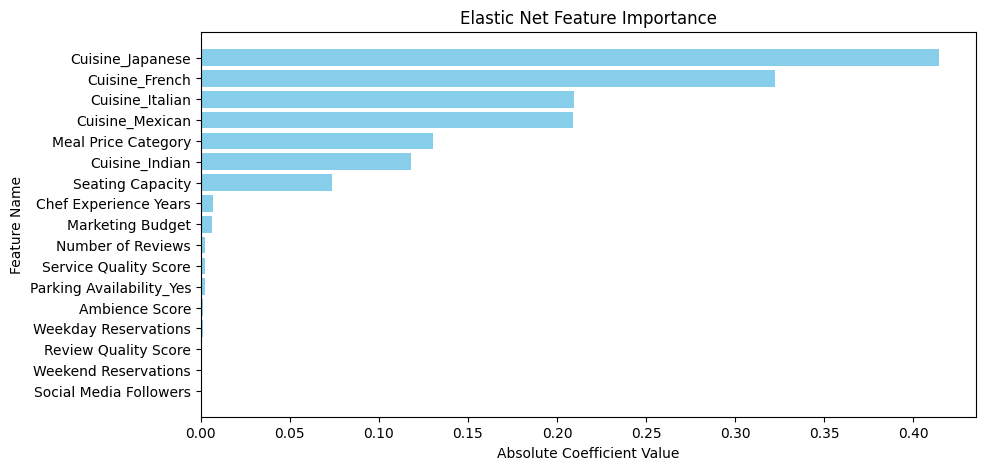

In [165]:
from sklearn.inspection import partial_dependence, PartialDependenceDisplay

# Extract feature importance (absolute value of coefficients)
feature_importance = np.abs(elasticnet_model_best.coef_)

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': Train_x1.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature Name')
plt.title('Elastic Net Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to show top features first
plt.show()

In [166]:
Train_x1.head()

,Seating Capacity,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Ambience Score,Service Quality Score,Weekend Reservations,Weekday Reservations,Review Quality Score,Cuisine_French,Cuisine_Indian,Cuisine_Italian,Cuisine_Japanese,Cuisine_Mexican,Parking Availability_Yes,Meal Price Category
0,1.659144,0.104789,0.313921,0.530910,1.004639,-0.795607,1.595884,2.015187,-0.424978,0.405031,0.0,0.0,1.0,0.0,0.0,1.0,1
1,1.163380,-0.350970,-0.372899,0.714167,0.010077,-0.330101,0.981525,0.546609,0.383516,0.038523,0.0,1.0,0.0,0.0,0.0,1.0,1
2,0.502363,-0.436363,-0.351959,1.080680,0.634820,0.988832,-1.706299,-1.656259,-0.084560,-0.486179,0.0,0.0,1.0,0.0,0.0,0.0,1
3,-0.323909,-1.095178,-1.228209,-1.301658,-0.772648,-0.873191,-1.168734,1.108124,0.043097,1.025449,0.0,0.0,0.0,0.0,1.0,0.0,0
4,-0.489163,-1.477957,-1.264926,0.164396,-0.033009,1.415546,1.672679,-0.144487,1.532428,0.009950,0.0,0.0,0.0,0.0,0.0,1.0,1


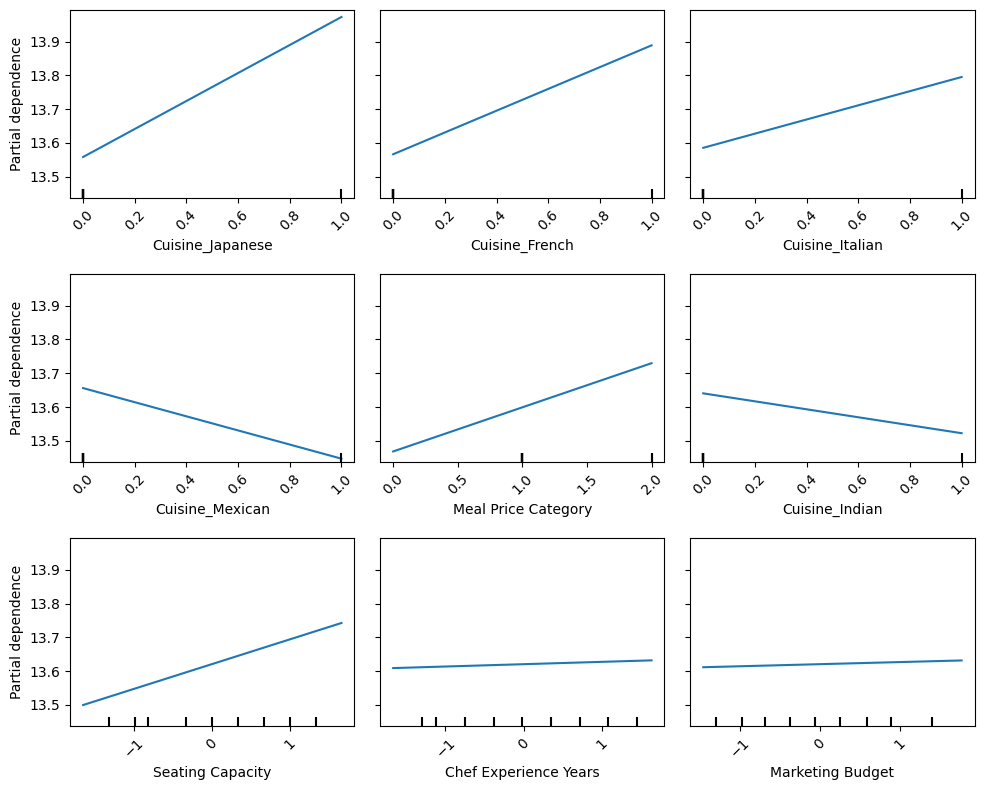

In [188]:
# Select all features for PDP
#all_features_pdp = Train_x1.columns.tolist()
interested_features = ['Cuisine_Japanese','Cuisine_French','Cuisine_Italian','Cuisine_Mexican','Meal Price Category','Cuisine_Indian','Seating Capacity','Chef Experience Years','Marketing Budget']
# Generate PDP plots for all features
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(10, 8))

# Plot PDP
display = PartialDependenceDisplay.from_estimator(
    elasticnet_model_best,
    Train_x1,
    features=interested_features,
    ax=ax,
    grid_resolution=50
)

# Make x-axis labels visible and rotated for clarity
for axes in display.axes_.ravel():
    for label in axes.get_xticklabels():
        label.set_visible(True)
        label.set_rotation(45)

plt.tight_layout()
plt.savefig("partial_dependence_plots.png", dpi=300)
plt.show()


In [52]:
# Remove the last two features from the dataset (Social Media Followers and Parking Availability_Yes)
selected_features = ['Cuisine_Japanese', 'Cuisine_French', 'Cuisine_Italian', 
                     'Cuisine_Mexican', 'Meal Price Category', 'Cuisine_Indian', 'Seating Capacity', 'Chef Experience Years', 
                     'Marketing Budget', 'Number of Reviews', 'Service Quality Score', 'Parking Availability_Yes', 'Ambience Score', 
                     'Weekday Reservations', 'Review Quality Score', 'Weekend Reservations']

Train_x1_selected = Train_x1[selected_features]  # Subset of the training data with selected features
Test_x1_selected = Test_x1[selected_features]  # Subset of the test data with selected features

# Define parameter grid for Elastic Net (Grid Search)
param_grid_elasticnet = {
    'alpha': np.logspace(-4, 2, 50),  
    'l1_ratio': np.linspace(0.1, 0.9, 9)  # Ratio of L1 (Lasso) to L2 (Ridge) penalty
}

# Initialize Elastic Net model
elasticnet_model_tuned = ElasticNet()

# Perform Grid Search with cross-validation (cv=10)
grid_search_elasticnet = GridSearchCV(
    elasticnet_model_tuned, 
    param_grid_elasticnet, 
    cv=10, 
    scoring='neg_mean_squared_error'
)

# Fit Grid Search on training data
grid_search_elasticnet.fit(Train_x1_selected, Train_y)

# Extract best parameters and best score
best_params_elasticnet = grid_search_elasticnet.best_params_
best_score_elasticnet = grid_search_elasticnet.best_score_

# Print best parameters and score
print("Best parameters for Elastic Net Regression:", best_params_elasticnet)
print("Best score for Elastic Net Regression:", best_score_elasticnet)

# Train the Best Elastic Net Model
# Initialize best Elastic Net model with optimal parameters
elasticnet_model_best = ElasticNet(**best_params_elasticnet)

# Train the model on scaled training data
elasticnet_model_best.fit(Train_x1_selected, Train_y)

# Predictions and Error Metrics
# Predictions on the training set
elasticnet_train_predictions = elasticnet_model_best.predict(Train_x1_selected)

# Predictions on the test set
elasticnet_test_predictions = elasticnet_model_best.predict(Test_x1_selected)

# Compute Performance Metrics
# Mean Squared Error (MSE)
elasticnet_train_mse = mean_squared_error(Train_y, elasticnet_train_predictions)
elasticnet_test_mse = mean_squared_error(Test_y, elasticnet_test_predictions)

# Root Mean Squared Error (RMSE)
elasticnet_train_rmse = np.sqrt(elasticnet_train_mse)
elasticnet_test_rmse = np.sqrt(elasticnet_test_mse)

# Mean Absolute Error (MAE)
elasticnet_train_mae = mean_absolute_error(Train_y, elasticnet_train_predictions)
elasticnet_test_mae = mean_absolute_error(Test_y, elasticnet_test_predictions)

# R² Score (Coefficient of Determination)
elasticnet_train_r2 = r2_score(Train_y, elasticnet_train_predictions)
elasticnet_test_r2 = r2_score(Test_y, elasticnet_test_predictions)

# MSE Difference (Overfitting Indicator)
elasticnet_mse_difference = elasticnet_train_mse - elasticnet_test_mse

# Print performance metrics
print("Elastic Net Regression Train MSE:", elasticnet_train_mse)
print("Elastic Net Regression Test MSE:", elasticnet_test_mse)
print("Elastic Net Regression Train RMSE:", elasticnet_train_rmse)
print("Elastic Net Regression Test RMSE:", elasticnet_test_rmse)
print("Elastic Net Regression Train MAE:", elasticnet_train_mae)
print("Elastic Net Regression Test MAE:", elasticnet_test_mae)
print("Elastic Net Regression Train R²:", elasticnet_train_r2)
print("Elastic Net Regression Test R²:", elasticnet_test_r2)
print("Elastic Net Train-Test MSE Difference:", elasticnet_mse_difference)


Best parameters for Elastic Net Regression: {'alpha': 0.0001, 'l1_ratio': 0.30000000000000004}
Best score for Elastic Net Regression: -0.0038185820565108325
Elastic Net Regression Train MSE: 0.0037519357643631284
Elastic Net Regression Test MSE: 0.003847835494300496
Elastic Net Regression Train RMSE: 0.06125304698023706
Elastic Net Regression Test RMSE: 0.062030923693755326
Elastic Net Regression Train MAE: 0.05033632965812095
Elastic Net Regression Test MAE: 0.051284165425323686
Elastic Net Regression Train R²: 0.959115634206035
Elastic Net Regression Test R²: 0.9568292885346983
Elastic Net Train-Test MSE Difference: -9.589972993736748e-05


In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20],  # Depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4]  # Minimum samples per leaf
}

# Perform Grid Search for best hyperparameters
rf_model_tuned = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(rf_model_tuned, param_grid_rf, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf.fit(Train_x1, Train_y)

# Get best parameters & score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print("Best parameters for Random Forest:", best_params_rf)
print("Best score for Random Forest:", best_score_rf)

# Fit model with best parameters
rf_model_best = RandomForestRegressor(**best_params_rf, random_state=42)
rf_model_best.fit(Train_x1, Train_y)

# Predictions on the training set
rf_train_predictions = rf_model_best.predict(Train_x1)

# Predictions on the test set
rf_test_predictions = rf_model_best.predict(Test_x1)

# Compute Performance Metrics
rf_train_mse = mean_squared_error(Train_y, rf_train_predictions)
rf_test_mse = mean_squared_error(Test_y, rf_test_predictions)

rf_train_rmse = np.sqrt(rf_train_mse)
rf_test_rmse = np.sqrt(rf_test_mse)

rf_train_mae = mean_absolute_error(Train_y, rf_train_predictions)
rf_test_mae = mean_absolute_error(Test_y, rf_test_predictions)

rf_train_r2 = r2_score(Train_y, rf_train_predictions)
rf_test_r2 = r2_score(Test_y, rf_test_predictions)

# MSE Difference (Overfitting Indicator)
rf_mse_difference = rf_train_mse - rf_test_mse

# Print results
print("Random Forest Train MSE:", rf_train_mse)
print("Random Forest Test MSE:", rf_test_mse)
print("Random Forest Train RMSE:", rf_train_rmse)
print("Random Forest Test RMSE:", rf_test_rmse)
print("Random Forest Train MAE:", rf_train_mae)
print("Random Forest Test MAE:", rf_test_mae)
print("Random Forest Train R²:", rf_train_r2)
print("Random Forest Test R²:", rf_test_r2)
print("Random Forest Train-Test MSE Difference:", rf_mse_difference)


Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best score for Random Forest: -0.0041345198977159915
Random Forest Train MSE: 0.0017639998228537541
Random Forest Test MSE: 0.003927284826968067
Random Forest Train RMSE: 0.04199999789111607
Random Forest Test RMSE: 0.06266805268211281
Random Forest Train MAE: 0.03336182999207047
Random Forest Test MAE: 0.050873710808623226
Random Forest Train R²: 0.9807779187738082
Random Forest Test R²: 0.9559379083751818
Random Forest Train-Test MSE Difference: -0.0021632850041143122


In [67]:
Train_x2=Train_df
Train_x2=Train_x2.drop(['Revenue','Log_Revenue'],axis=1)
Train_x2.head()

,Cuisine,Seating Capacity,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Review Quality Score,Meal Price Category
Name,,,,,,,,,,,,,
Restaurant 5818,Italian,90,5031,58655,13,805,3.5,9.6,Yes,86,29,817.414508,Medium
Restaurant 808,Indian,87,4113,44551,14,528,4.7,8.0,Yes,52,48,704.871694,Medium
Restaurant 2853,Italian,83,3941,44981,16,702,8.1,1.0,No,1,37,543.752893,Medium
Restaurant 1744,Mexican,78,2614,26987,3,310,3.3,2.4,No,65,40,1007.924775,Low
Restaurant 2785,American,77,1843,26233,11,516,9.2,9.8,Yes,36,75,696.098096,Medium


In [69]:
Test_x2=Test_df
Test_x2=Test_x2.drop(['Revenue','Log_Revenue'],axis=1)
Test_x2.head()

,Cuisine,Seating Capacity,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Review Quality Score,Meal Price Category
Name,,,,,,,,,,,,,
Restaurant 7623,Japanese,86,9065,96518,18,696,9.8,5.7,Yes,8,72,916.451777,High
Restaurant 1029,Mexican,89,1414,20379,4,714,7.7,6.1,No,45,0,269.778574,Medium
Restaurant 2557,French,77,2487,30116,9,118,9.2,4.3,No,6,6,341.468235,High
Restaurant 2376,Japanese,85,3459,42040,13,220,4.4,8.4,Yes,52,67,564.044357,High
Restaurant 594,Japanese,74,5519,63074,3,628,1.8,9.3,Yes,25,52,1113.637721,High


In [70]:
# === Train set ===

encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
Train_x2[["Meal Price Category"]] = encoder.fit_transform(Train_x2[["Meal Price Category"]])
Train_x2["Meal Price Category"] = Train_x2["Meal Price Category"].astype(int)

# === Test set ===


encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
Test_x2[["Meal Price Category"]] = encoder.fit_transform(Test_x2[["Meal Price Category"]])
Test_x2["Meal Price Category"] = Test_x2["Meal Price Category"].astype(int)

In [71]:
Train_x2.head()

,Cuisine,Seating Capacity,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Review Quality Score,Meal Price Category
Name,,,,,,,,,,,,,
Restaurant 5818,Italian,90,5031,58655,13,805,3.5,9.6,Yes,86,29,817.414508,1
Restaurant 808,Indian,87,4113,44551,14,528,4.7,8.0,Yes,52,48,704.871694,1
Restaurant 2853,Italian,83,3941,44981,16,702,8.1,1.0,No,1,37,543.752893,1
Restaurant 1744,Mexican,78,2614,26987,3,310,3.3,2.4,No,65,40,1007.924775,0
Restaurant 2785,American,77,1843,26233,11,516,9.2,9.8,Yes,36,75,696.098096,1


In [75]:
# One-hot encode in Train
Train_x2_encoded = pd.get_dummies(Train_x2, columns=['Cuisine', 'Parking Availability'], drop_first=False)

# One-hot encode in Test
Test_x2_encoded = pd.get_dummies(Test_x2, columns=['Cuisine', 'Parking Availability'], drop_first=False)
# Convert boolean values to integers (0 and 1)
Train_x2_encoded = Train_x2_encoded.astype(int)
Test_x2_encoded = Test_x2_encoded.astype(int)

In [76]:
Train_x2_encoded.head()

,Seating Capacity,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Ambience Score,Service Quality Score,Weekend Reservations,Weekday Reservations,Review Quality Score,Meal Price Category,Cuisine_American,Cuisine_French,Cuisine_Indian,Cuisine_Italian,Cuisine_Japanese,Cuisine_Mexican,Parking Availability_No,Parking Availability_Yes
Name,,,,,,,,,,,,,,,,,,,
Restaurant 5818,90,5031,58655,13,805,3,9,86,29,817,1,0,0,0,1,0,0,0,1
Restaurant 808,87,4113,44551,14,528,4,8,52,48,704,1,0,0,1,0,0,0,0,1
Restaurant 2853,83,3941,44981,16,702,8,1,1,37,543,1,0,0,0,1,0,0,1,0
Restaurant 1744,78,2614,26987,3,310,3,2,65,40,1007,0,0,0,0,0,0,1,1,0
Restaurant 2785,77,1843,26233,11,516,9,9,36,75,696,1,1,0,0,0,0,0,0,1


In [77]:
import xgboost as xgb
# Initialize the XGBRegressor
reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, early_stopping_rounds=50, learning_rate=0.01)

In [78]:
# Define the parameter grid for tuning
param_grid = {
    'max_depth': [3, 5],  # Fewer options
    'min_child_weight': [1, 3],  # Fewer options
    'subsample': [0.8],  # Single value
    'colsample_bytree': [0.8],  # Single value
    'gamma': [0, 0.1],  # Fewer options
    'reg_alpha': [0, 0.1],  # Fewer options
    'reg_lambda': [0, 0.1]  # Fewer options
}

grid_search = GridSearchCV(estimator=reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=2, verbose=1)

# Fit the grid search to the data
grid_search.fit(Train_x2_encoded, Train_y, eval_set=[(Train_x2_encoded, Train_y), (Test_x2_encoded, Test_y)], verbose=True)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[0]	validation_0-rmse:0.30060	validation_1-rmse:0.29699
[1]	validation_0-rmse:0.29812	validation_1-rmse:0.29453
[2]	validation_0-rmse:0.29566	validation_1-rmse:0.29206
[3]	validation_0-rmse:0.29325	validation_1-rmse:0.28966
[4]	validation_0-rmse:0.29085	validation_1-rmse:0.28726
[5]	validation_0-rmse:0.28849	validation_1-rmse:0.28492
[6]	validation_0-rmse:0.28614	validation_1-rmse:0.28257
[7]	validation_0-rmse:0.28386	validation_1-rmse:0.28030
[8]	validation_0-rmse:0.28159	validation_1-rmse:0.27805
[9]	validation_0-rmse:0.27942	validation_1-rmse:0.27588
[10]	validation_0-rmse:0.27731	validation_1-rmse:0.27378
[11]	validation_0-rmse:0.27513	validation_1-rmse:0.27157
[12]	validation_0-rmse:0.27298	validation_1-rmse:0.26938
[13]	validation_0-rmse:0.27080	validation_1-rmse:0.26721
[14]	validation_0-rmse:0.26865	validation_1-rmse:0.26506
[15]	validation_0-rmse:0.26663	validation_1-rmse:0.26300
[16]	validation_0-rmse:0.26450	valid

In [80]:
# Train the model with the best parameters
best_reg = xgb.XGBRegressor(**grid_search.best_params_, objective='reg:squarederror', n_estimators=1000, early_stopping_rounds=50, learning_rate=0.01)
best_reg.fit(Train_x2_encoded, Train_y, eval_set=[(Train_x2_encoded, Train_y), (Test_x2_encoded, Test_y)], verbose=True)

[0]	validation_0-rmse:0.30060	validation_1-rmse:0.29699
[1]	validation_0-rmse:0.29812	validation_1-rmse:0.29453
[2]	validation_0-rmse:0.29566	validation_1-rmse:0.29206
[3]	validation_0-rmse:0.29325	validation_1-rmse:0.28966
[4]	validation_0-rmse:0.29085	validation_1-rmse:0.28726
[5]	validation_0-rmse:0.28849	validation_1-rmse:0.28492
[6]	validation_0-rmse:0.28614	validation_1-rmse:0.28257
[7]	validation_0-rmse:0.28386	validation_1-rmse:0.28030
[8]	validation_0-rmse:0.28159	validation_1-rmse:0.27805
[9]	validation_0-rmse:0.27942	validation_1-rmse:0.27588
[10]	validation_0-rmse:0.27731	validation_1-rmse:0.27378
[11]	validation_0-rmse:0.27513	validation_1-rmse:0.27157
[12]	validation_0-rmse:0.27298	validation_1-rmse:0.26938
[13]	validation_0-rmse:0.27080	validation_1-rmse:0.26721
[14]	validation_0-rmse:0.26865	validation_1-rmse:0.26506
[15]	validation_0-rmse:0.26663	validation_1-rmse:0.26300
[16]	validation_0-rmse:0.26450	validation_1-rmse:0.26087
[17]	validation_0-rmse:0.26234	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [81]:
# Evaluate the model
y_pred = best_reg.predict(Train_x2_encoded)
mse = mean_squared_error(Train_y, y_pred)
mae = mean_absolute_error(Train_y, y_pred)
r2 = r2_score(Train_y, y_pred)

print(f"Mean Squared Train Error: {mse}")
print(f"Mean Absolute Train Error: {mae}")
print(f"Train R^2 Score: {r2}")

Mean Squared Train Error: 0.0031410215546263448
Mean Absolute Train Error: 0.04591318888228815
Train R^2 Score: 0.9657726884810165


In [83]:
# Evaluate the model
y_pred = best_reg.predict(Test_x2_encoded)
mse = mean_squared_error(Test_y, y_pred)
mae = mean_absolute_error(Test_y, y_pred)
r2 = r2_score(Test_y, y_pred)

print(f"Mean Squared Test Error: {mse}")
print(f"Mean Absolute Test Error: {mae}")
print(f"Test R^2 Score: {r2}")

Mean Squared Test Error: 0.0037667898035531537
Mean Absolute Test Error: 0.05071482372485835
Test R^2 Score: 0.9577385790009726


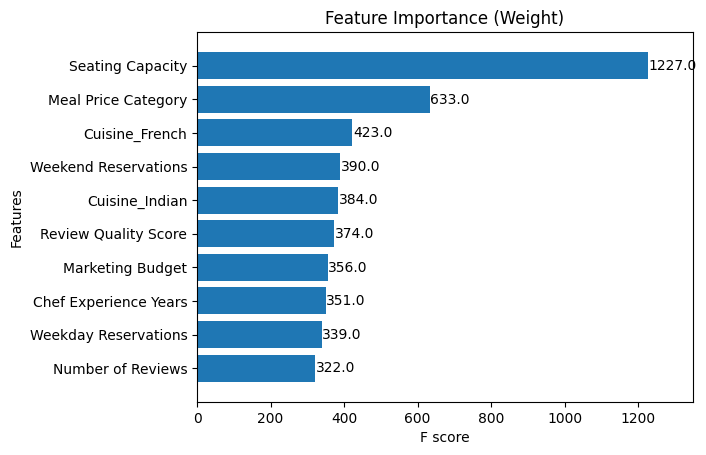

In [84]:
# Plot feature importance
xgb.plot_importance(best_reg, importance_type='weight', max_num_features=10, height=0.8)
plt.title('Feature Importance (Weight)')
plt.grid(False)
plt.show()

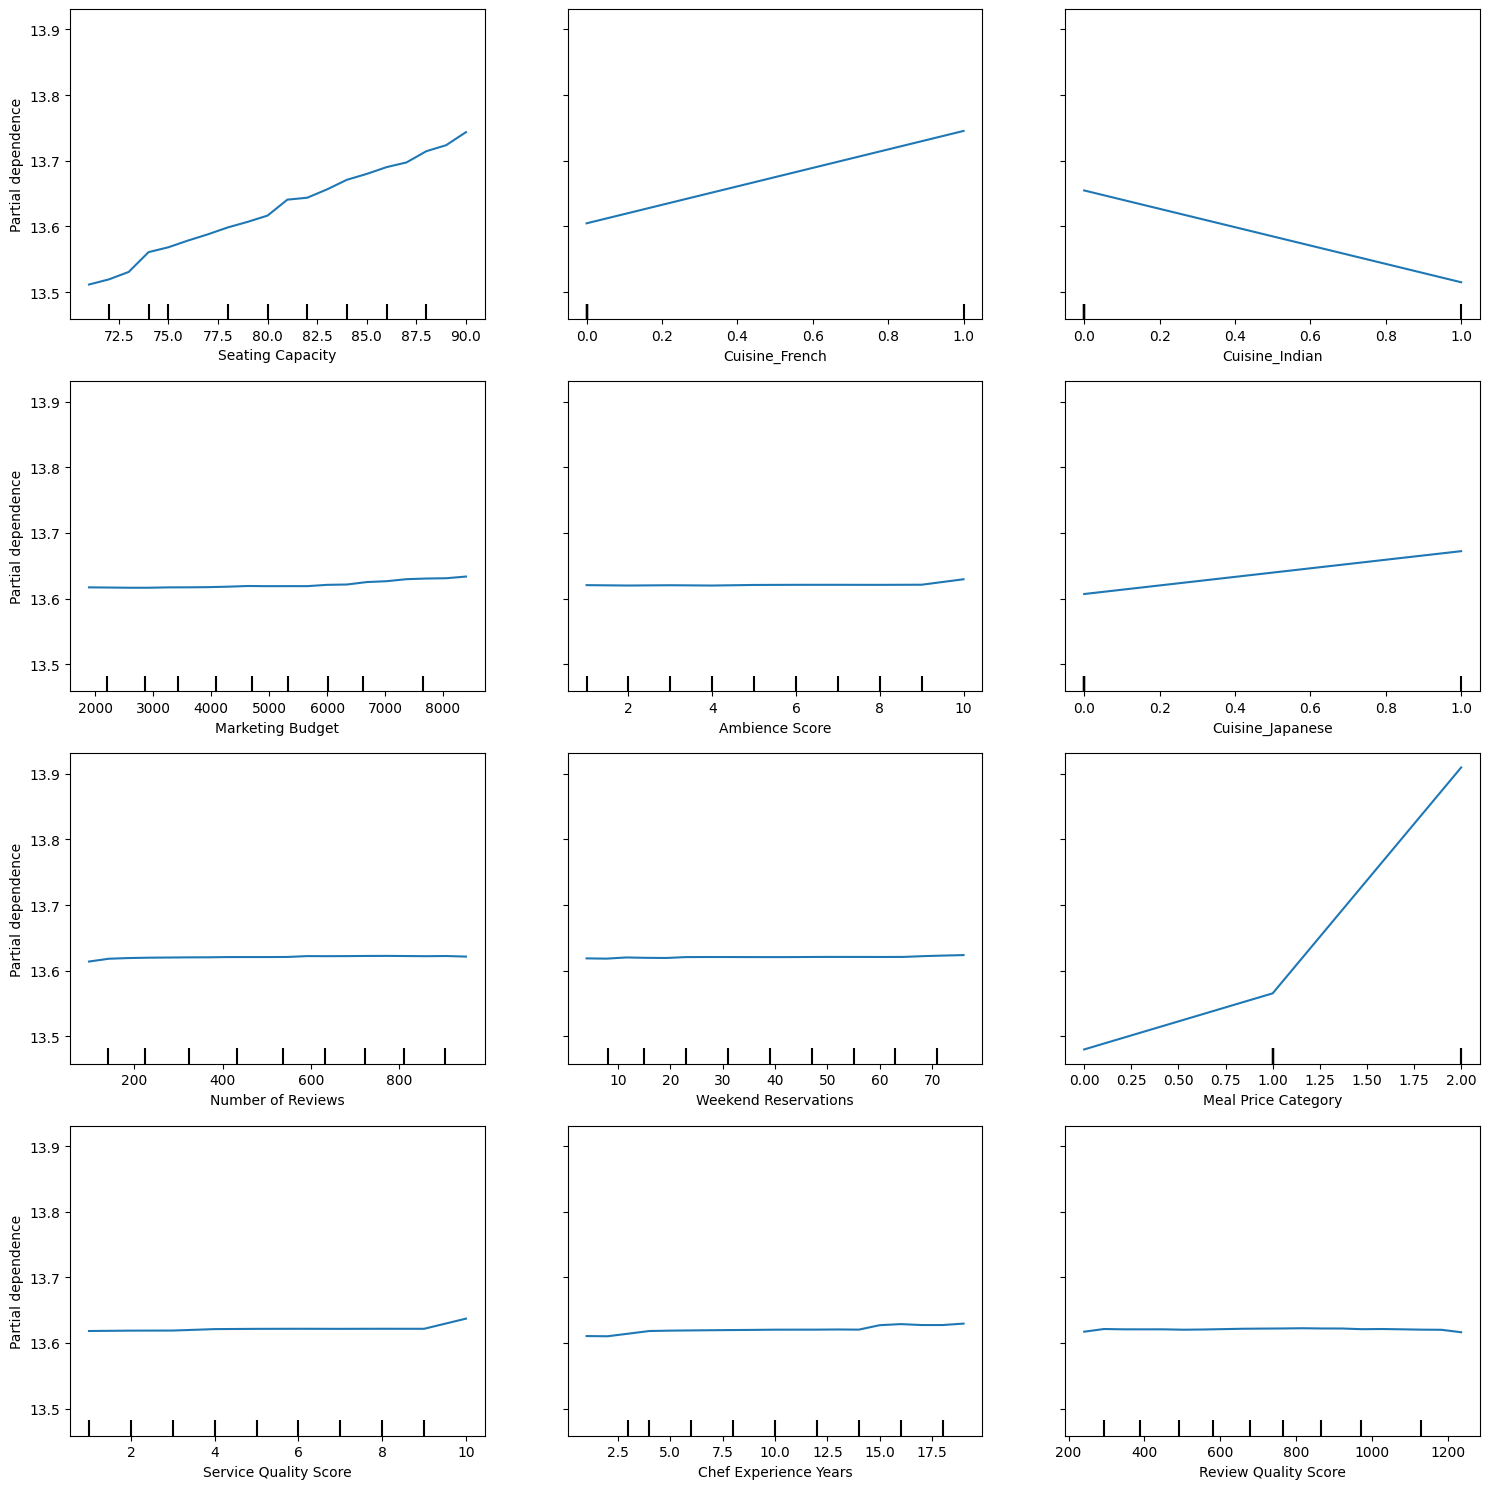

In [88]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# List of interested variables
interested_variables = ['Seating Capacity', 'Cuisine_French', 'Cuisine_Indian', 'Marketing Budget','Ambience Score','Cuisine_Japanese','Number of Reviews','Weekend Reservations','Meal Price Category','Service Quality Score','Chef Experience Years','Review Quality Score']

# Create a grid of PDPs
fig, ax = plt.subplots(figsize=(15, 15))
PartialDependenceDisplay.from_estimator(
    best_reg,
    Train_x2_encoded,
    features=interested_variables,
    ax=ax,
    grid_resolution=20
)
plt.tight_layout()
plt.show()